# Trafic Light Classifier Simulator

In [1]:
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.3
set_session(tf.Session(config=config))

/usr/local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## 1. Import Images from Data/Simulator...

In [2]:
X_train = []
x_label = []
for img_class, directory in enumerate(['data/sim_red', 'data/sim_yellow', 'data/sim_green', 'data/sim_none']):
    for i, file_name in enumerate(glob.glob("{}/*.jpg".format(directory))):
        file = cv2.imread(file_name)

        file = cv2.cvtColor(file, cv2.COLOR_BGR2RGB);
        resized = cv2.resize(file, (32,64))

        X_train.append(resized/255.)
        x_label.append(img_class)
        
X_train = np.array(X_train)
x_label = np.array(x_label)

In [3]:
X_train

array([[[[0.5372549 , 0.65490196, 0.80392157],
         [0.5372549 , 0.65490196, 0.80392157],
         [0.5372549 , 0.65490196, 0.80392157],
         ...,
         [0.53333333, 0.65098039, 0.8       ],
         [0.53333333, 0.65098039, 0.8       ],
         [0.53333333, 0.65098039, 0.8       ]],

        [[0.54117647, 0.65882353, 0.80784314],
         [0.54117647, 0.65882353, 0.80784314],
         [0.54117647, 0.65882353, 0.80784314],
         ...,
         [0.5372549 , 0.65490196, 0.80392157],
         [0.5372549 , 0.65490196, 0.80392157],
         [0.5372549 , 0.65490196, 0.80392157]],

        [[0.54117647, 0.65882353, 0.80784314],
         [0.54117647, 0.65882353, 0.80784314],
         [0.54117647, 0.65882353, 0.80784314],
         ...,
         [0.5372549 , 0.65490196, 0.80392157],
         [0.5372549 , 0.65490196, 0.80392157],
         [0.5372549 , 0.65490196, 0.80392157]],

        ...,

        [[0.63137255, 0.74901961, 0.88627451],
         [0.63137255, 0.75686275, 0.85490196]

In [4]:
x_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,

## 2. Build CNN

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from keras.utils.np_utils import to_categorical
from keras import losses, optimizers, regularizers

In [16]:
categorical_labels = to_categorical(x_label)  # https://keras.io/utils/#to_categorical
num_classes = 4
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(64, 32, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(2,2))
Dropout(0.8)
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D(2,2))
Dropout(0.8)
model.add(Flatten())
model.add(Dense(8, activation='relu', kernel_initializer='random_uniform', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(num_classes, activation='softmax'))
loss = losses.categorical_crossentropy
optimizer = optimizers.Adam()
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 8, 32)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 32776     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
Total para

In [7]:
model.fit(X_train, categorical_labels, batch_size=128, epochs=30, verbose=True, validation_split=0.1, shuffle=True)

Train on 330 samples, validate on 37 samples
Epoch 1/30
330/330 [==============================] - 1s 4ms/step - loss: 1.7016 - acc: 0.2545 - val_loss: 2.0175 - val_acc: 0.0000e+00
Epoch 2/30
330/330 [==============================] - 1s 3ms/step - loss: 1.6325 - acc: 0.2455 - val_loss: 2.0989 - val_acc: 0.0000e+00
Epoch 3/30
330/330 [==============================] - 1s 4ms/step - loss: 1.5733 - acc: 0.2485 - val_loss: 1.9403 - val_acc: 0.0000e+00
Epoch 4/30
330/330 [==============================] - 1s 4ms/step - loss: 1.5116 - acc: 0.4242 - val_loss: 2.0002 - val_acc: 0.0000e+00
Epoch 5/30
330/330 [==============================] - 2s 6ms/step - loss: 1.4441 - acc: 0.4121 - val_loss: 2.2820 - val_acc: 0.0000e+00
Epoch 6/30
330/330 [==============================] - 1s 3ms/step - loss: 1.3919 - acc: 0.4727 - val_loss: 2.4116 - val_acc: 0.0000e+00
Epoch 7/30
330/330 [==============================] - 2s 6ms/step - loss: 1.3166 - acc: 0.4818 - val_loss: 2.2507 - val_acc: 0.0000e+00
Epo

In [8]:
score = model.evaluate(X_train, categorical_labels, verbose=True)
print(score)

367/367 [==============================] - 1s 2ms/step
[0.4328935321735101, 0.9318801091542361]


In [9]:
prediction = model.predict(X_train, verbose=1)
for i in range(len(prediction)):
    print (i, prediction[i], categorical_labels[i])

367/367 [==============================] - 1s 2ms/step
(0, array([9.8914564e-01, 1.4850943e-04, 4.7140084e-03, 5.9918179e-03],
      dtype=float32), array([1., 0., 0., 0.]))
(1, array([9.9593711e-01, 5.7248930e-05, 3.6228276e-03, 3.8285670e-04],
      dtype=float32), array([1., 0., 0., 0.]))
(2, array([0.355391  , 0.00125052, 0.6177681 , 0.0255903 ], dtype=float32), array([1., 0., 0., 0.]))
(3, array([0.9923543 , 0.00280887, 0.00369497, 0.00114195], dtype=float32), array([1., 0., 0., 0.]))
(4, array([8.532724e-01, 6.595149e-05, 8.809683e-02, 5.856488e-02],
      dtype=float32), array([1., 0., 0., 0.]))
(5, array([0.4042003 , 0.00315387, 0.08627601, 0.5063698 ], dtype=float32), array([1., 0., 0., 0.]))
(6, array([9.5896965e-01, 2.4189858e-04, 1.2193437e-02, 2.8595094e-02],
      dtype=float32), array([1., 0., 0., 0.]))
(7, array([9.7800851e-01, 2.7043675e-04, 1.8178806e-02, 3.5421625e-03],
      dtype=float32), array([1., 0., 0., 0.]))
(8, array([9.9601775e-01, 1.2481517e-05, 9.0152724e

      dtype=float32), array([0., 1., 0., 0.]))
(114, array([3.5483344e-04, 9.0606743e-01, 9.3576610e-02, 1.0403429e-06],
      dtype=float32), array([0., 1., 0., 0.]))
(115, array([7.9022214e-04, 9.0165132e-01, 9.7557783e-02, 6.9312676e-07],
      dtype=float32), array([0., 1., 0., 0.]))
(116, array([3.8773633e-06, 9.9936372e-01, 6.3236099e-04, 5.6845759e-09],
      dtype=float32), array([0., 1., 0., 0.]))
(117, array([4.9252380e-05, 9.9446446e-01, 5.4863081e-03, 4.6643503e-08],
      dtype=float32), array([0., 1., 0., 0.]))
(118, array([8.7740491e-06, 9.9843043e-01, 1.5607930e-03, 8.5697556e-09],
      dtype=float32), array([0., 1., 0., 0.]))
(119, array([0.0163093 , 0.5243985 , 0.45338717, 0.00590508], dtype=float32), array([0., 1., 0., 0.]))
(120, array([1.8862184e-03, 9.7698420e-01, 2.1129671e-02, 4.4005155e-08],
      dtype=float32), array([0., 1., 0., 0.]))
(121, array([5.6542858e-04, 9.9653047e-01, 2.8432496e-03, 6.0781585e-05],
      dtype=float32), array([0., 1., 0., 0.]))
(12

(221, array([0.01059952, 0.0020403 , 0.9858174 , 0.00154275], dtype=float32), array([0., 0., 1., 0.]))
(222, array([0.02974449, 0.01379979, 0.9518245 , 0.00463125], dtype=float32), array([0., 0., 1., 0.]))
(223, array([0.12871268, 0.01063566, 0.5536056 , 0.30704612], dtype=float32), array([0., 0., 1., 0.]))
(224, array([5.6299935e-03, 4.1090455e-03, 9.8979330e-01, 4.6774343e-04],
      dtype=float32), array([0., 0., 1., 0.]))
(225, array([0.27682397, 0.00313502, 0.6693055 , 0.05073546], dtype=float32), array([0., 0., 1., 0.]))
(226, array([6.0412465e-03, 1.0556498e-02, 9.8276687e-01, 6.3542445e-04],
      dtype=float32), array([0., 0., 1., 0.]))
(227, array([0.10342923, 0.2081961 , 0.6523707 , 0.03600404], dtype=float32), array([0., 0., 1., 0.]))
(228, array([0.02866951, 0.04766105, 0.9189881 , 0.00468138], dtype=float32), array([0., 0., 1., 0.]))
(229, array([4.64929827e-03, 1.30950585e-02, 9.82183814e-01, 7.18766023e-05],
      dtype=float32), array([0., 0., 1., 0.]))
(230, array([0.

(310, array([0.03495595, 0.02185419, 0.87383807, 0.06935174], dtype=float32), array([0., 0., 0., 1.]))
(311, array([0.05579628, 0.00145659, 0.1758209 , 0.76692617], dtype=float32), array([0., 0., 0., 1.]))
(312, array([0.22400701, 0.00817092, 0.21702744, 0.55079466], dtype=float32), array([0., 0., 0., 1.]))
(313, array([4.2751694e-01, 8.9932131e-05, 7.4577548e-02, 4.9781567e-01],
      dtype=float32), array([0., 0., 0., 1.]))
(314, array([0.05662156, 0.00172652, 0.02179427, 0.9198577 ], dtype=float32), array([0., 0., 0., 1.]))
(315, array([0.11085064, 0.01039614, 0.22873762, 0.6500156 ], dtype=float32), array([0., 0., 0., 1.]))
(316, array([0.24735497, 0.00967685, 0.11840733, 0.62456083], dtype=float32), array([0., 0., 0., 1.]))
(317, array([0.29099852, 0.00297118, 0.06584316, 0.64018714], dtype=float32), array([0., 0., 0., 1.]))
(318, array([0.15192148, 0.00114106, 0.02554218, 0.8213953 ], dtype=float32), array([0., 0., 0., 1.]))
(319, array([0.09889727, 0.00166532, 0.2617225 , 0.6377

In [10]:
%matplotlib inline
fig = plt.figure()
import operator

LABELS = list(enumerate(['Red', 'Yellow', 'Green', 'None']))

def read_prediction(predictions):
    index, value = max(enumerate(predictions), key=operator.itemgetter(1))
    print('Max prediction score', value)
    print('Predicted label: ', LABELS[index][1])
    
def read_label(example_image_id):
    print(prediction[example_image_id])
    print('Ground truth label: ', print_label(categorical_labels[example_image_id]))
    read_prediction(prediction[example_image_id])
    plt.imshow(X_train[example_image_id])  
    
def print_label(categorical_label):
    color = ''
    for i in range(categorical_label.shape[0]):
        if categorical_label[i] == 1.0:           
            color = LABELS[i][1]
            if color != '': return color
        else:
            color = 'None'
    return color    

In [11]:
import h5py # needed for saving model
model.save('tl_classifier_sim.h5')

[2.7254887e-04 9.5259511e-01 4.7131743e-02 5.3300653e-07]
('Ground truth label: ', 'Yellow')
('Max prediction score', 0.9525951)
('Predicted label: ', 'Yellow')


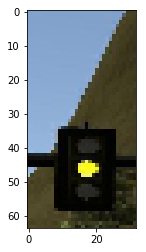

In [12]:
read_label(152)

[9.9205095e-01 1.6112121e-05 7.4748793e-03 4.5811632e-04]
('Ground truth label: ', 'Red')
('Max prediction score', 0.99205095)
('Predicted label: ', 'Red')


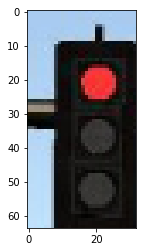

In [13]:
read_label(46)

[0.28788093 0.21807799 0.46162984 0.03241128]
('Ground truth label: ', 'Green')
('Max prediction score', 0.46162984)
('Predicted label: ', 'Green')


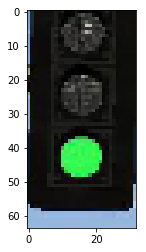

In [14]:
read_label(189)

[0.17757645 0.00965723 0.10256173 0.71020454]
('Ground truth label: ', 'None')
('Max prediction score', 0.71020454)
('Predicted label: ', 'None')


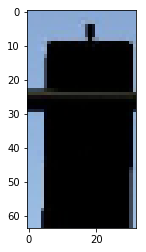

In [15]:
read_label(342)